# IMPORT LIBRARY

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# MEMBACA GAMBAR

In [25]:
image = cv2.imread('Nama.jpg')

# SESUAIKAN KONTRAS

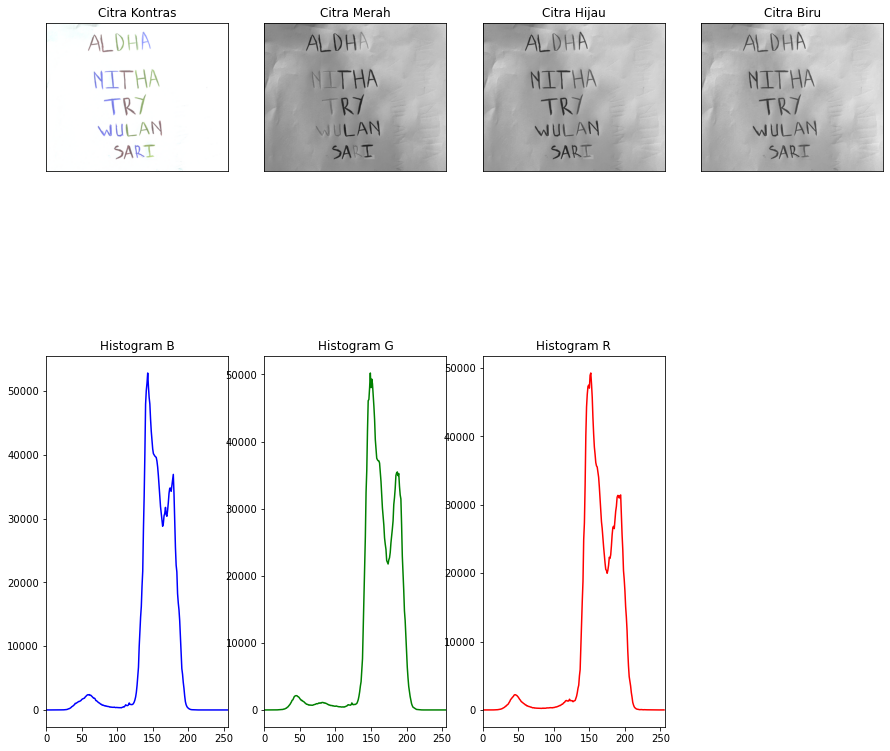

In [32]:
plt.figure(figsize=(15, 15))

alpha = 1.5
beta = 50
contrast_image = cv2. convertScaleAbs(image, alpha=alpha, beta=beta)

#CONVERT IMAGE
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# MEMBAGI CITRA MENJADI CHANNEL WARNA R, G, dan B
R, G, B = cv2.split(image_rgb)

#MENAMPILKAN GAMBAR 
images = [contrast_image, R, G, B]
titles = ['Citra Kontras', 'Citra Merah', 'Citra Hijau', 'Citra Biru']
for i in range(4):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

# Calculate and plot histograms for each channel
color = ('b','g','r')
for i, col in enumerate(color):
    plt.subplot(2, 4, i+5)
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title('Histogram ' + col.upper())

plt.show()

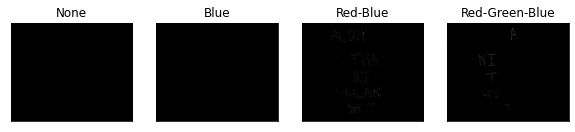

In [33]:
# Membaca citra
img = cv2.imread('Nama.jpg')

# Mengubah citra ke ruang warna RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Membagi citra menjadi channel warna R, G, dan B
r, g, b = cv2.split(img_rgb)

# Membuat list untuk menyimpan citra threshold
thresh_images = []
titles = ['None', 'Blue', 'Red-Blue', 'Red-Green-Blue']

# Melakukan thresholding untuk setiap kondisi
for i, channel in enumerate([img, b, r-b, r-g-b]):
    # Menghitung histogram
    hist = cv2.calcHist([channel], [0], None, [256], [0,256])

# Mencari nilai ambang batas
    thresholds = []
    for i in range(1, 255):
        if hist[i-1] < hist[i] and hist[i+1] < hist[i]:
            thresholds.append(i)

# Mengurutkan nilai ambang batas
    thresholds.sort()
    
 # Melakukan thresholding dengan latar belakang hitam
    _, thresh_img = cv2.threshold(channel, thresholds[0], 255, cv2.THRESH_BINARY_INV)
    thresh_images.append(thresh_img)

# Menampilkan citra threshold
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1), plt.imshow(thresh_images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [35]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Nama.jpg')

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split into RGB channels
R, G, B = cv2.split(image_rgb)

# Calculate histograms for each channel
hist_R = cv2.calcHist([R], [0], None, [256], [0,256])
hist_G = cv2.calcHist([G], [0], None, [256], [0,256])
hist_B = cv2.calcHist([B], [0], None, [256], [0,256])

# Find thresholds for each channel
threshold_R = np.argmax(hist_R)
threshold_G = np.argmax(hist_G)
threshold_B = np.argmax(hist_B)

# Sort thresholds
thresholds = sorted([threshold_R, threshold_G, threshold_B])

# Print the thresholds
print("Thresholds (R, G, B):", thresholds)


Thresholds (R, G, B): [143, 149, 152]
